## Customer characteristic For FordGoBike in May 2019

         By Ziyad Alkhoenin

## Overview 

** Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share **

** This dataset is in May 2019 only and i have analyzed the user behaviour in this month **

### Individual trips by User types :
 - Subscriber means the user pay monthly for the services
 - Customer means the user pay as they go

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Cleaned_data.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Stage,hour,day
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321,5th St at Folsom,37.780146,-122.403071,60,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990,Female,No,Adult,20,4
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246,Berkeley Civic Center,37.869060,-122.270556,266,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994,Male,No,Adult,19,4
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149,Emeryville Town Hall,37.831275,-122.285633,149,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988,Male,No,Adult,23,4
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186,Lakeside Dr at 14th St,37.801319,-122.262642,186,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998,Male,No,Adult,23,4
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,368,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967,Male,No,Middle-Aged Adults,23,4


In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])

In [7]:
type_user = df.groupby('user_type').mean().reset_index()

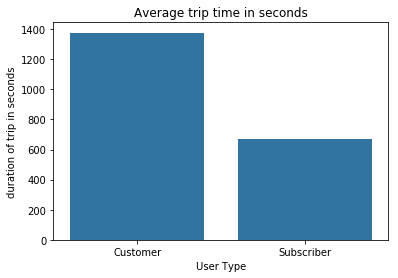

In [8]:
color = sns.color_palette()[0]
sns.barplot(data=type_user,x='user_type',y='duration_sec',color=color)
plt.title('Average trip time in seconds')
plt.xlabel('User Type')
plt.ylabel('duration of trip in seconds')
plt.show()

### What we see above is that customer tend to take longer rides than subscriber almost the double time 

In [9]:
day_plot = df.groupby(df.start_time.dt.dayofweek).mean().reset_index()


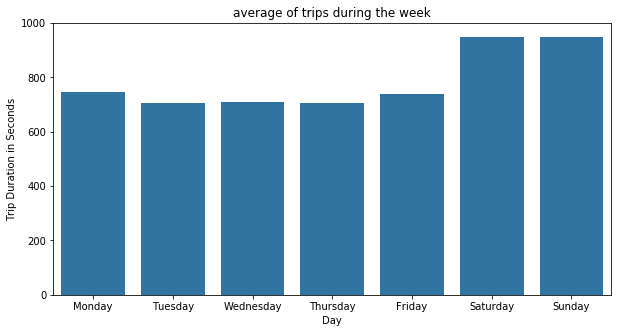

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=day_plot,x='start_time',y='duration_sec',color=color)
plt.yticks([0,200,400,600,800,1000])
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('average of trips during the week')
plt.xlabel('Day')
plt.ylabel('Trip Duration in Seconds')
plt.show()

### What we see is that average of time people take for riding bike is consistence through out the week expect in the weekends people takes longer ride

In [11]:
typeXgender = df.groupby(['user_type','member_gender']).mean().reset_index()

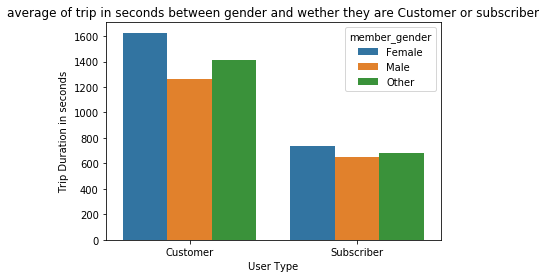

In [12]:
sns.barplot(data=typeXgender,x='user_type',y='duration_sec',hue='member_gender')
plt.title('average of trip in seconds between gender and wether they are Customer or subscriber')
plt.xlabel('User Type')
plt.ylabel('Trip Duration in seconds')
plt.show()

### Here we can see that female customer takes longer rides than male while if subscriber female there is no significant time diffrence between them 

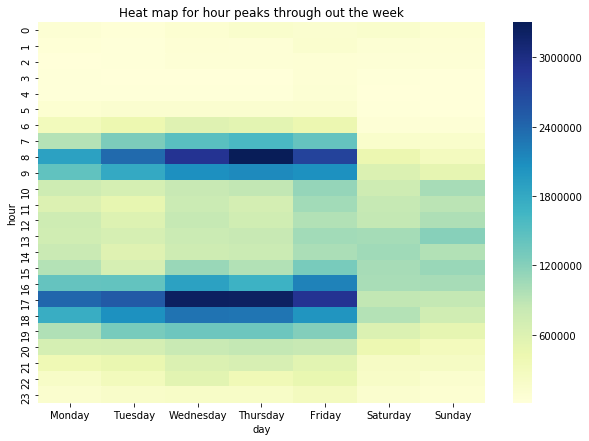

In [19]:
#plot for total duration usage 
df['hour'] = df.start_time.dt.hour
df['day'] = df.start_time.dt.weekday
sumHourDay = df.groupby(['hour','day']).sum().reset_index()
plt.figure(figsize=(10,7))
sns.heatmap(sumHourDay.pivot('hour','day','duration_sec'), cmap = 'YlGnBu',xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Heat map for hour peaks through out the week')
plt.show()

### - As you can see above that people tend to take more trip during 8 am and 5 pm and that is because the woking hours start at this time and people might see bike as a more convenient way to transport than other way 
### - also we can see the trip counts decrease alot during 12 AM and 6 AM 
###  - also in the weekends people don't ride bikes a lot

## Conclusion 
 - There are 2 types of users, subscriber who pay monthly they tend to have short trips maybe they only use the services for work, and customer who takes longer trip maybe to try the services.
 - the use of services hikes between 8 Am and 9 AM and then decrecess and then hikes in 5 pm which mean people use the services mostly from going to work and return home
 - trip duration consistent through out the week and increase in the weekends
 - Female customer tends to take longer rides than male customer while if they are subscriber they increase a little bit  